# Visualización de Datos : Pandas, Matplotlib, Seaborn, Pandas-Profiling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## PANDAS 

In [2]:
df = pd.read_csv('temporal.csv')
df.head(10)

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [3]:
df.tail()

,Mes,data science,machine learning,deep learning,categorical
189,2019-10-01,90,98,98,0
190,2019-11-01,87,97,96,0
191,2019-12-01,81,89,91,0
192,2020-01-01,94,94,93,1
193,2020-02-01,100,99,99,1


In [4]:
round(df.describe(),2)

,data science,machine learning,deep learning,categorical
count,194.00,194.00,194.00,194.00
mean,20.95,27.40,24.23,0.26
std,23.95,28.09,34.48,0.44
min,4.00,7.00,1.00,0.00
25%,6.00,9.00,2.00,0.00
50%,8.00,13.00,3.00,0.00
75%,26.75,31.50,34.00,1.00
max,100.00,100.00,100.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [6]:
df['categorical'].unique()

array([1, 0], dtype=int64)

In [7]:
df['data science'].unique()

array([ 12,   9,  10,   7,   8,   6,   5,   4,  11,  13,  16,  19,  17,
        18,  20,  23,  27,  25,  24,  22,  26,  29,  36,  33,  34,  41,
        42,  44,  43,  47,  53,  52,  48,  58,  57,  59,  60,  64,  68,
        70,  67,  61,  76,  77,  75,  80,  85,  88,  95,  90,  87,  81,
        94, 100], dtype=int64)

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#Nos aseguramos que la columna Mes tenga formato de fecha
df['Mes'] = pd.to_datetime(df['Mes'])
#Aplicamos el estilo en la visualización
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [10]:
 #Simplificamos el diccionario de formato con valores que sí que tienen sentido para nuestros datos
format_dict = {'Mes':'{:%m-%Y}'}
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [11]:
#definiendo una funcion para pintar colores negativos
def color_negative_red(val):
    color = 'red' if val < 0 else 'blue'
    return 'color: %s' % color

In [12]:
color_negative_red(-10)

'color: red'

In [13]:
df2 = pd.DataFrame(np.random.uniform(-5, 6, (5, 5)), columns = list("ABCDE"))
df2

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [14]:
df2.style.applymap(color_negative_red)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [15]:
#cambiando el color del fondo
#https://htmlcolorcodes.com/es/ (colores)
def text_format(val):
    color = '#A93226 ' if val < 0 else '#EAEDED'
    return 'background-color: %s' % color

In [16]:
df2.style.applymap(text_format)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [17]:
#max
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [18]:
df2.style.apply(highlight_max)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [19]:
df2.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [20]:
#max por columna
df2.style.highlight_max(axis=0)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [21]:
#max por fila
df2.style.highlight_max(axis=0)

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


### Gradiente colores

In [22]:
df.head(10).style.format(format_dict).\
background_gradient(subset=['data science', 'machine learning'],
                    cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [23]:
df.head(10).style.format(format_dict).\
background_gradient(cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [24]:
df2.style.background_gradient(cmap='Greens')

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [25]:
# Compress the color range
(df2.loc[:4]
    .style
    .background_gradient(cmap='viridis', low=.5, high=0)
    .highlight_null('red'))

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


## Bar charts

In [26]:
df2.style.bar(subset=['A', 'B'], color='#F7DC6F')

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [27]:
df2.style.bar(subset=['A', 'B'], align='zero', color=['#d65f5f', '#5fba7d'])

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [28]:
df2.style.bar(subset=['A', 'B'], align='mid', color=['#d65f5f', '#5fba7d'])

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [29]:
df2.style.bar(subset=['A', 'B'], align='left', color=['#d65f5f', '#5fba7d'])

,A,B,C,D,E
0,4.271808,-1.997549,1.291346,-0.633505,-2.083855
1,-2.864581,-3.428525,-3.550073,5.912663,1.158818
2,-0.800578,-4.527898,0.573615,-2.786564,-1.464510
3,-3.531157,5.824569,4.565437,2.038193,0.358460
4,-4.840929,-1.989521,-3.208408,4.725103,-1.695908


In [30]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


## Pandas-profiling

In [31]:
# pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [33]:
from pandas_profiling import ProfileReport

In [34]:
prof = ProfileReport(df)
prof.to_file('informe.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Matplotlib

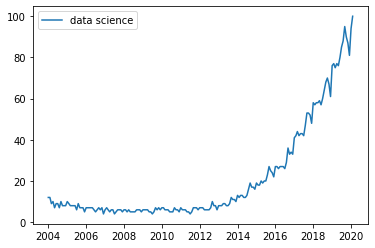

In [38]:
plt.plot(df['Mes'],df['data science'], label='data science')
plt.legend()
# El parámetro label es para indicar la leyenda.

### http://research.iac.es/sieinvens/python-course/source/matplotlib.html

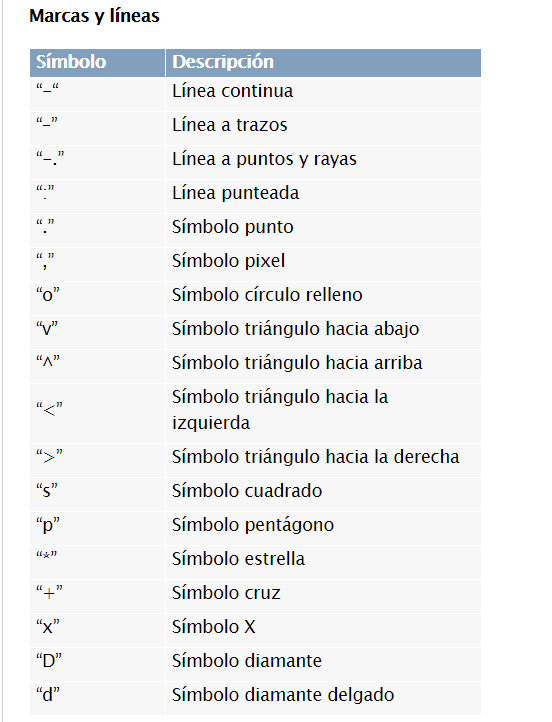

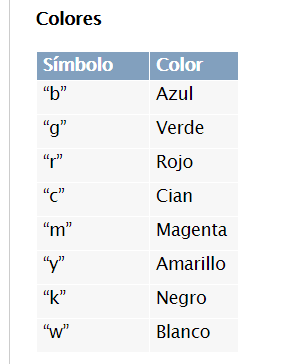

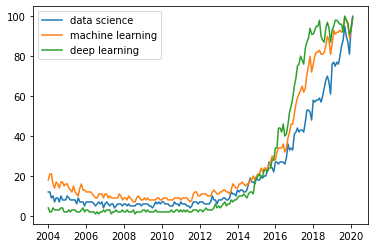

In [44]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.legend()

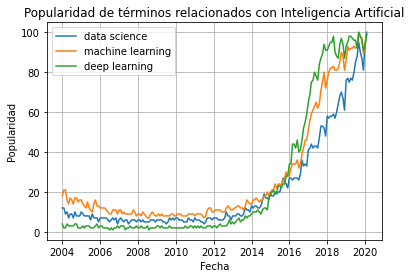

In [46]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con Inteligencia Artificial')
plt.grid(True)
plt.legend()

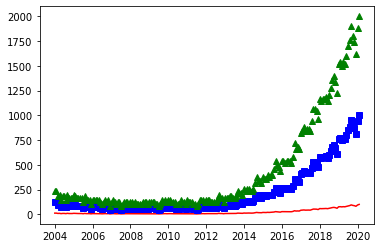

In [58]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science']*10, 'bs')
plt.plot(df['Mes'], df['data science']*20, 'g^')

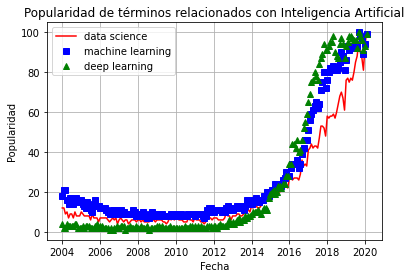

In [59]:
plt.plot(df['Mes'], df['data science'], 'r-',label='data science')
plt.plot(df['Mes'], df['machine learning'], 'bs',label='machine learning')
plt.plot(df['Mes'], df['deep learning'], 'g^',label='deep learning')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con Inteligencia Artificial')
plt.grid(True)
plt.legend()

### Bar Plot (plt.bar)

<BarContainer object of 194 artists>

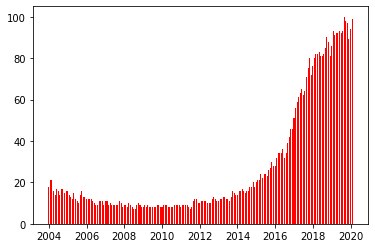

In [60]:
plt.bar(df['Mes'], df['machine learning'], width=20, color='red')

<BarContainer object of 194 artists>

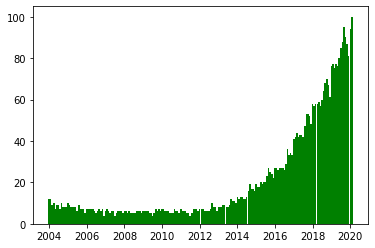

In [70]:
plt.bar(df['Mes'], df['data science'], width=30, color='green')

<BarContainer object of 194 artists>

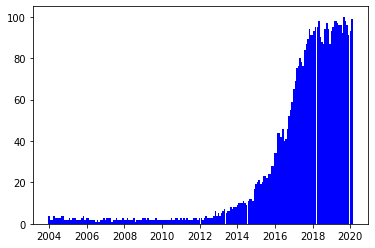

In [71]:
plt.bar(df['Mes'], df['deep learning'], width=30, color='blue')

## Scatter Plot (plt.scatter)

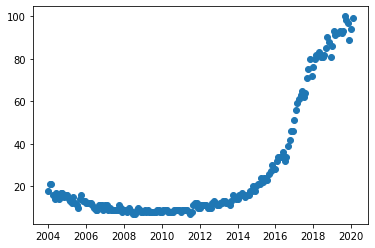

In [73]:
plt.scatter(df['Mes'], df['machine learning'])

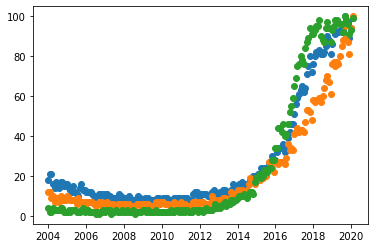

In [74]:
plt.scatter(df['Mes'], df['machine learning'])
plt.scatter(df['Mes'], df['data science'])
plt.scatter(df['Mes'], df['deep learning'])

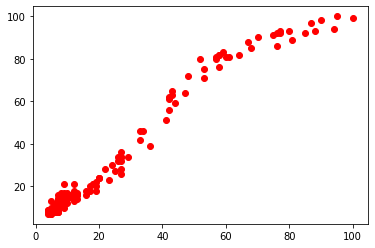

In [76]:
plt.scatter(df['data science'], df['machine learning'],color='red')

## HISTOGRAMA (plt.hist)

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

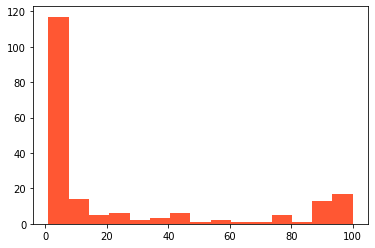

In [81]:
plt.hist(df['deep learning'], bins=15, color='#FF5733')

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

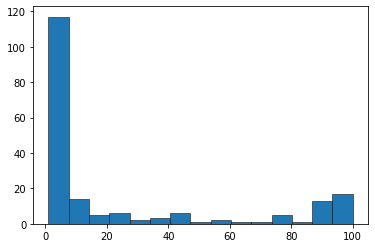

In [93]:
plt.hist(df['deep learning'], bins=15,edgecolor = 'black',  linewidth=0.5)

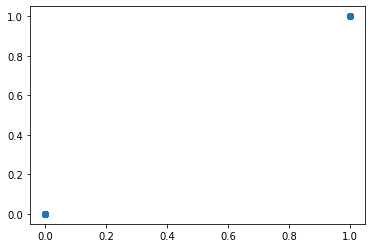

In [94]:
plt.scatter(df['categorical'], df['categorical'])

(array([144.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

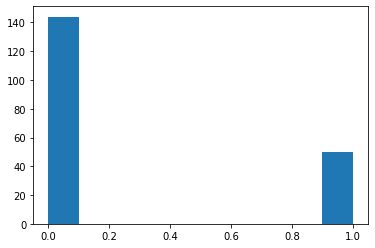

In [95]:
plt.hist(df['categorical'])

In [96]:
import numpy as np 
np.random.seed(444) 
data = np.random.choice(  
         a=[0, 1, 2],  
         size=50,  
         p=[0.5, 0.3, 0.2])  

(array([22.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0., 12.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

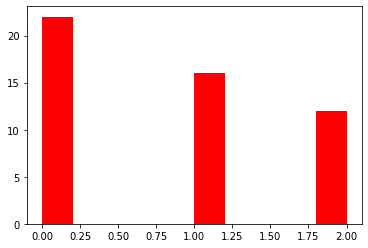

In [97]:
plt.hist(data, color=['red'])

## Pie chart

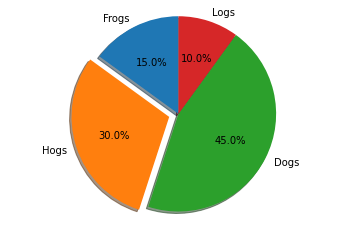

In [104]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

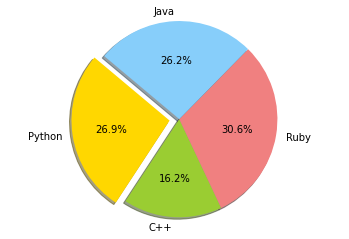

In [105]:
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


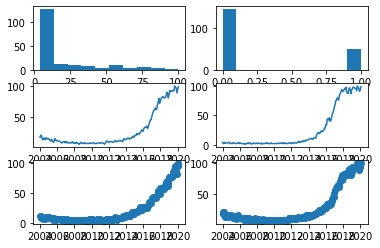

In [107]:
fig, axes = plt.subplots(3,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].hist(df['categorical'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])
axes[2, 0].scatter(df['Mes'], df['data science'])
axes[2, 1].scatter(df['Mes'], df['machine learning'])

Text(2006-01-01 00:00:00, 50, 'Aquí pasa algo!')

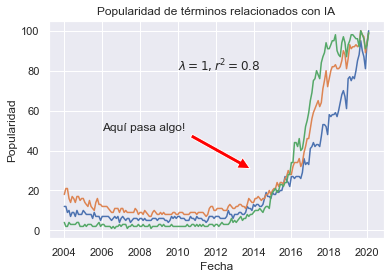

In [169]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Fecha')
plt.ylabel('Popularidad')
plt.title('Popularidad de términos relacionados con IA')
plt.grid(True)
plt.text(x=pd.to_datetime("2010-01-01"),
         y=80,
         s=r'$\lambda=1, r^2=0.8$') #Las coordenadas usan las mismas unidades que el gráfico
plt.annotate('Aquí pasa algo!',
             xy=(pd.to_datetime('2014-01-01'), 30),
             xytext=(pd.to_datetime('2006-01-01'), 50),
             arrowprops={'facecolor':'red', 'shrink':0.05})

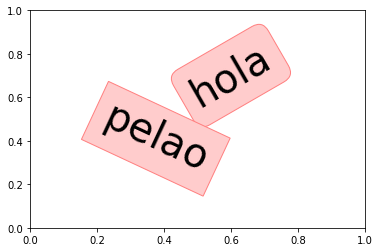

In [121]:
plt.text(0.6, 0.7, "hola", size=40, rotation=30.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.text(0.55, 0.6, "pelao", size=40, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

## BOX PLOT

{'whiskers': [<matplotlib.lines.Line2D at 0x24584fd4048>,
 'caps': [<matplotlib.lines.Line2D at 0x24584fe1d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24584fe1548>],
 'medians': [<matplotlib.lines.Line2D at 0x24584fe6ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24584fece48>],
 'means': []}

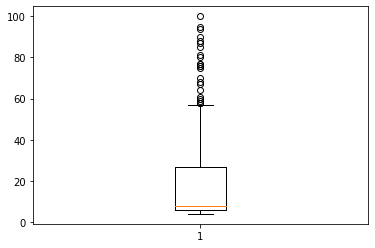

In [147]:
plt.boxplot(df['data science'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2458502dbc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2458504ce08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2458504c148>],
 'medians': [<matplotlib.lines.Line2D at 0x24585053bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24585053dc8>],
 'means': []}

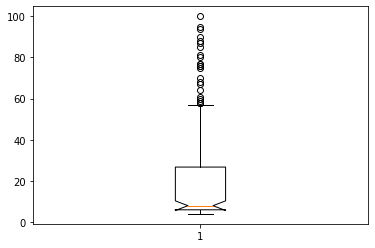

In [148]:
plt.boxplot(df['data science'], notch=True, sym="o")

{'whiskers': [<matplotlib.lines.Line2D at 0x24585099908>,
 'caps': [<matplotlib.lines.Line2D at 0x245850b8b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x245850b3c08>,
 'medians': [<matplotlib.lines.Line2D at 0x245850bdf88>,
 'fliers': [<matplotlib.lines.Line2D at 0x245850bd9c8>,
 'means': []}

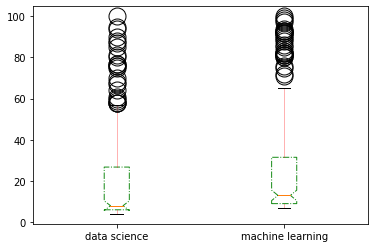

In [149]:
line_props = dict(color="r", alpha=0.3)
bbox_props = dict(color="g", alpha=0.9, linestyle="dashdot")
flier_props = dict(marker="o", markersize=17)

plt.boxplot((df['data science'],
             df['machine learning']),
            notch=True,
            sym="o",
            labels=["data science", "machine learning"],
            whiskerprops=line_props,
            boxprops=bbox_props,
            flierprops=flier_props)

(array([127.,  14.,  11.,   8.,   5.,  11.,   4.,   6.,   5.,   3.]),
 array([  4. ,  13.6,  23.2,  32.8,  42.4,  52. ,  61.6,  71.2,  80.8,
         90.4, 100. ]),
 <BarContainer object of 10 artists>)

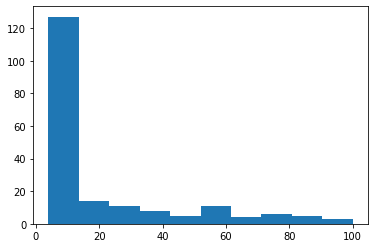

In [150]:
plt.hist(df['data science']) #No hay normalidad

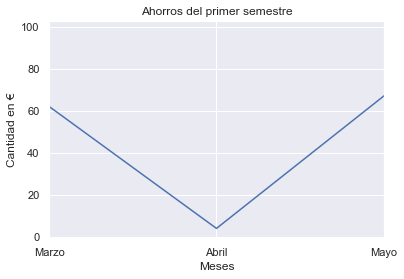

In [237]:
import numpy as np
import matplotlib.pyplot as plt

ahorros = np.random.randint(100, size=[6])
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
mapeado = range(len(meses))

plt.plot(ahorros)                         # Añadimos el gráfico
plt.xticks(mapeado, meses)                # Mapeamos los valores horizontales
plt.xlim(2, 4)                            # Configuramos el límite horizontal
plt.title("Ahorros del primer semestre")  # Configuramos el título
plt.xlabel("Meses")                       # Configuramos la etiqueta del eje X
plt.ylabel("Cantidad en €")               # Configuramos la etiqueta del eje Y
plt.show()                                # Finalmente lo mostramos

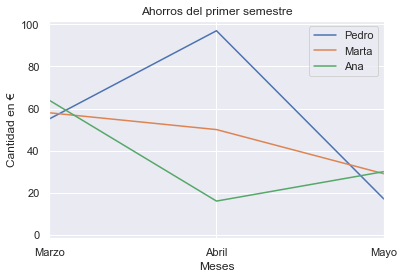

In [241]:
# Mostramos los ahorros de tres personas diferentes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
mapeado = range(len(meses))

plt.plot(np.random.randint(100, size=[6]), label="Pedro")
plt.plot(np.random.randint(100, size=[6]), label="Marta")
plt.plot(np.random.randint(100, size=[6]), label="Ana")
plt.xticks(mapeado, meses)
plt.xlim(2, 4)
plt.title("Ahorros del primer semestre")
plt.xlabel("Meses")
plt.ylabel("Cantidad en €")
plt.legend()
plt.show()

## SEABORN 

In [152]:
import seaborn as sns

<AxesSubplot:xlabel='Mes', ylabel='data science'>

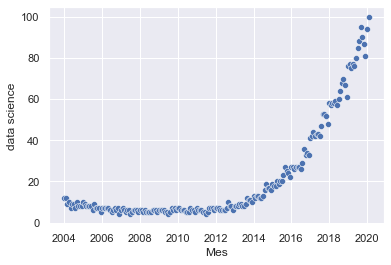

In [172]:
#manera de llamar a scatter plot según https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x="Mes", y="data science")

<AxesSubplot:xlabel='Mes', ylabel='data science'>

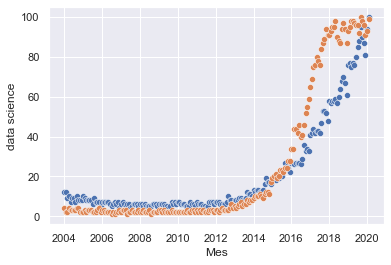

In [173]:
sns.scatterplot(data=df, x="Mes", y="data science")
sns.scatterplot(data=df, x="Mes", y="deep learning")

## PARAMETROS SEABORN

### hue= muestra los niveles de campo que uno seleccione

<AxesSubplot:xlabel='Mes', ylabel='data science'>

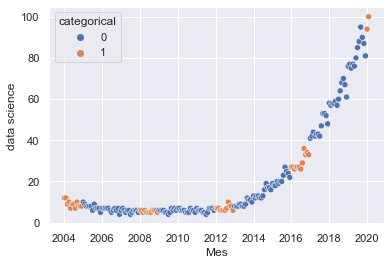

In [177]:
sns.scatterplot(data=df, x="Mes", y="data science", hue='categorical')

### Style= cambia la forma de los según la data que contenga el campo

<AxesSubplot:xlabel='Mes', ylabel='data science'>

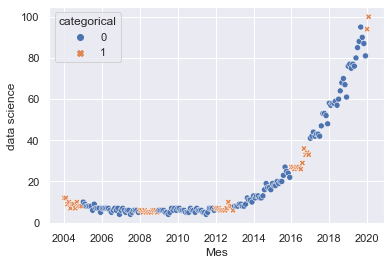

In [190]:
sns.scatterplot(data=df, x="Mes", y="data science", hue='categorical',style='categorical')

### Assigning hue and style to different variables will vary colors and markers independently:

<AxesSubplot:xlabel='Mes', ylabel='data science'>

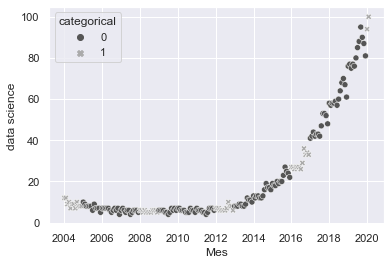

In [191]:
sns.scatterplot(data=df, x="Mes", y="data science",
                hue="categorical",
                style='categorical',
                palette="gist_yarg_r")

### Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid:

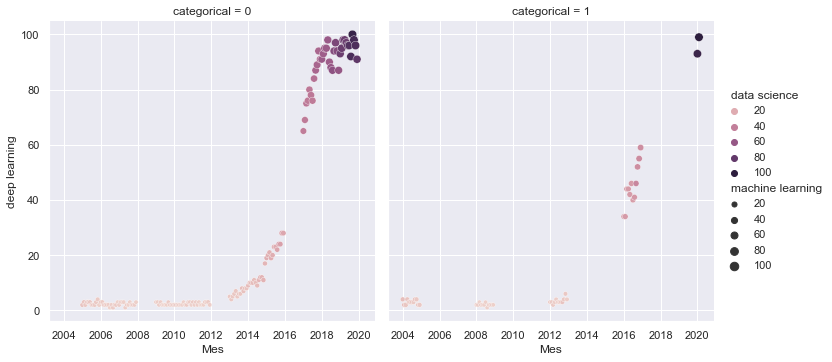

In [199]:
sns.relplot(data=df,
            x='Mes',
            y='deep learning',
            hue='data science',
            size='machine learning',
            col='categorical')

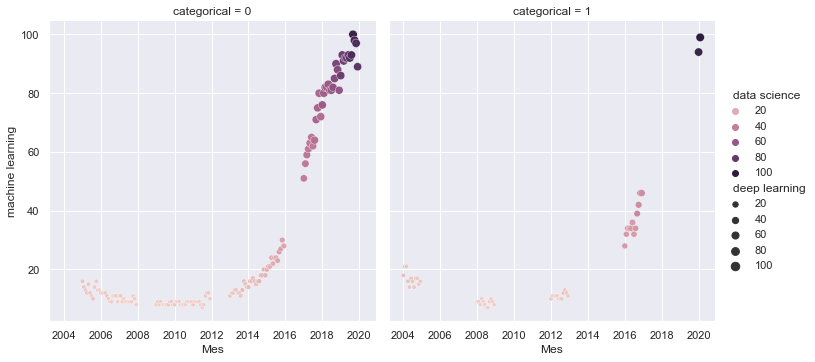

In [201]:
sns.relplot(data=df,
            x='Mes',
            y='machine learning',
            hue='data science',
            size='deep learning',
            col='categorical')

## HEATMAP

In [202]:
uniform_data = np.random.rand(10, 12)

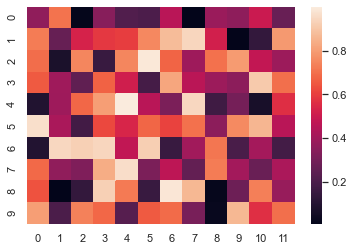

In [203]:
ax = sns.heatmap(uniform_data)

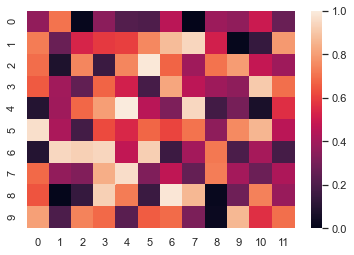

In [204]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

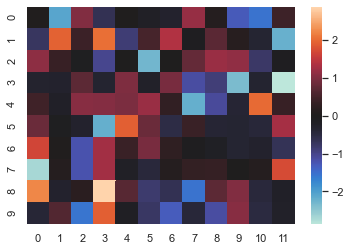

In [205]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

<AxesSubplot:>

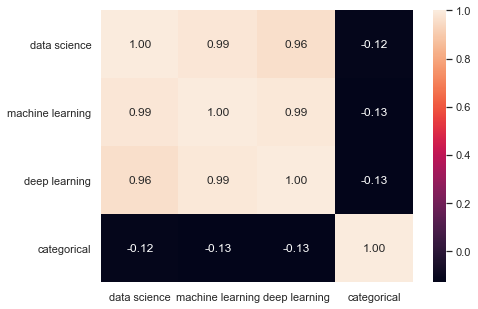

In [210]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

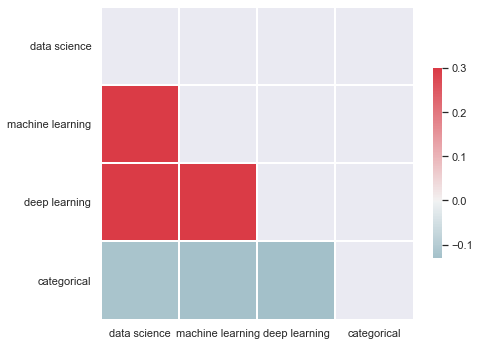

In [211]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [212]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,data science,machine learning,deep learning,categorical
data science,1.00,0.99,0.96,-0.12
machine learning,0.99,1.00,0.99,-0.13
deep learning,0.96,0.99,1.00,-0.13
categorical,-0.12,-0.13,-0.13,1.00


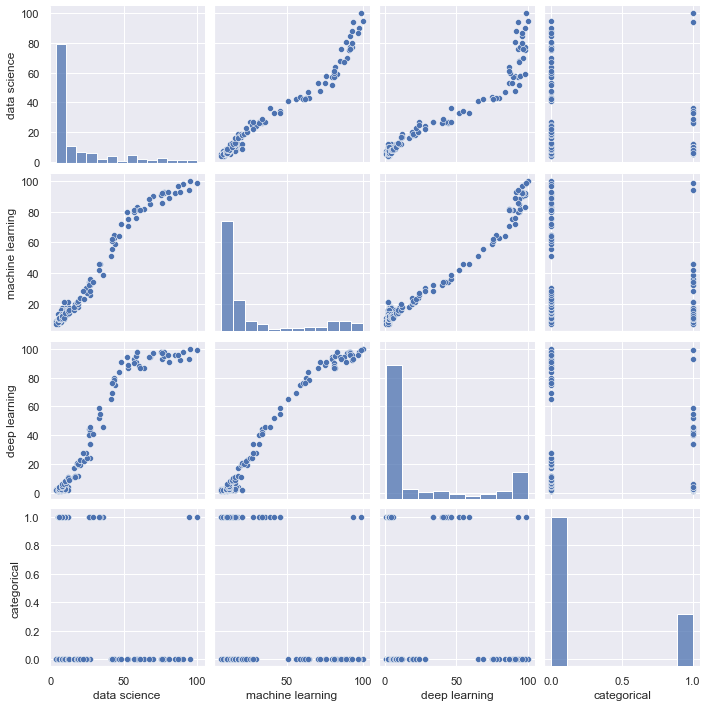

In [213]:
sns.pairplot(df)

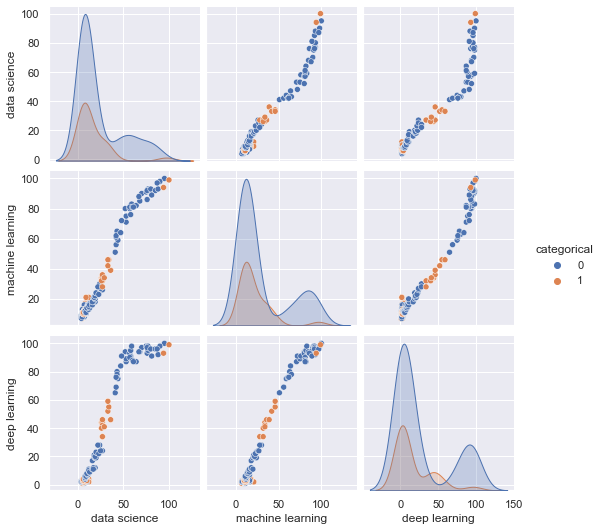

In [214]:
sns.pairplot(df, hue='categorical')

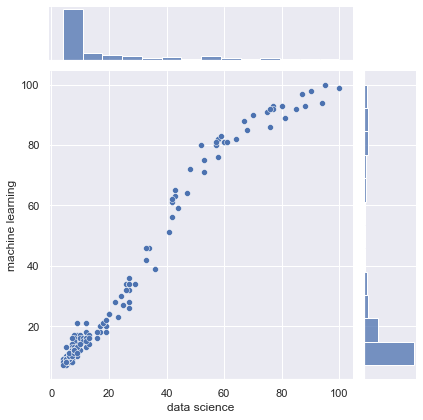

In [215]:
sns.jointplot(x='data science', y='machine learning', data=df)

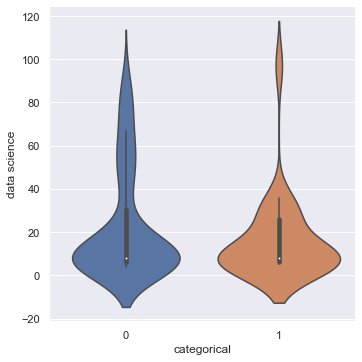

In [221]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)

<AxesSubplot:xlabel='machine learning'>

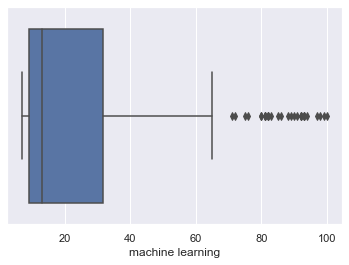

In [225]:
sns.boxplot(x='machine learning', data=df)

Text(0.5, 1.0, 'Machine Learning')

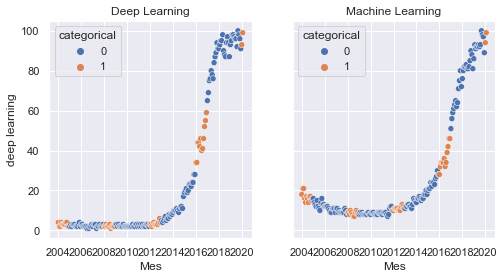

In [226]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')

## Visualización de datos 2: Bokeh, Folium.

In [227]:
from bokeh.plotting import figure, output_file, save, gridplot, show

In [229]:
# Preparamos los datos
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Salida estática HTML
output_file("bokeh_sample_1.html")

# Creamos un nuevo gráfico con un titulo y dos ejes (x e y)
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# Agregamos la linea con los datos
p.line(x, y, legend_label="Temp.", line_width=2)

# Mostramos el resultado
show(p)
save(p)

'C:\\Users\\marce\\OneDrive\\Magister\\RAMOS\\Data_Visualization\\VISUALIZACION\\bokeh_sample_1.html'

In [230]:
# create a Figure object
p = figure(plot_width=300, plot_height=300, tools="pan,reset,save")

# add a Circle renderer to this figure
p.circle([1, 2.5, 3, 2], [2, 3, 1, 1.5], radius=0.3, alpha=0.5)

# specify how to output the plot(s)
output_file("foo.html")

# display the figure
show(p)

In [242]:
output_file('bokeh_sample_2.html')

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

i = [6, 7, 8, 9, 10]
j = [12, 14, 4, 8, 10]

w = [12, 14, 16, 18, 20]
z = [24, 28, 8, 16, 20]

s1 = figure(width=250, plot_height=250, title='X - Y')
s1.circle(x, y, size=10, color='navy', alpha=0.5)

s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title='I - J') #share both axis range
s2.triangle(i, j, size=10, color='red', alpha=0.5)

s3 = figure(width=250, height=250, x_range=s1.x_range, title='W - Z') #share only one axis range
s3.square(w, z, size=5, color='green', alpha=0.5)

p = gridplot([[s1, s2, s3]])
show(p)
save(p)

'C:\\Users\\marce\\OneDrive\\Magister\\RAMOS\\Data_Visualization\\VISUALIZACION\\bokeh_sample_2.html'

## FOLIUM

In [234]:
import folium

m1 = folium.Map(location=[40.448351050331894, -3.677494096911744], tiles='openstreetmap', zoom_start=18)
m1.save('mapa1.html')
m1

In [236]:
from folium import FeatureGroup 

loc = 'EAE Business School'
subj = 'Data Visualization'
name = 'Marcelo Contreras'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)

title_html_2 = '''
               <h2 align="right" style="font-size:14px"><b>{}</b></h2>
               '''.format(subj)   

title_html_3 = '''
               <h1 align="left" style="font-size:12px"><b>{}</b></h1>
               '''.format(name)   

m = folium.Map(location=[40.448351050331894, -3.677494096911744],
               zoom_start=18)

m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(title_html_2))
m.get_root().html.add_child(folium.Element(title_html_3))

feature_group = FeatureGroup(name='Layer1')
feature_group2 = FeatureGroup(name='Layer2')

folium.Marker(location=[40.448351050331894, -3.677494096911744]).add_to(feature_group)
folium.Marker(location=[40.4523667, -3.6907254]).add_to(feature_group2)

m.add_child(feature_group)
m.add_child(feature_group2)

m.save('mapa2.html')
m

In [245]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge, factor_cmap

output_file("periodic.html")

periods = ["I", "II", "III", "IV", "V", "VI", "VII"]
groups = [str(x) for x in range(1, 19)]

df = elements.copy()
df["atomic mass"] = df["atomic mass"].astype(str)
df["group"] = df["group"].astype(str)
df["period"] = [periods[x-1] for x in df.period]
df = df[df.group != "-"]
df = df[df.symbol != "Lr"]
df = df[df.symbol != "Lu"]

cmap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "metal"                : "#d93b43",
    "halogen"              : "#999d9a",
    "metalloid"            : "#e08d49",
    "noble gas"            : "#eaeaea",
    "nonmetal"             : "#f1d4Af",
    "transition metal"     : "#599d7A",
}

TOOLTIPS = [
    ("Name", "@name"),
    ("Atomic number", "@{atomic number}"),
    ("Atomic mass", "@{atomic mass}"),
    ("Type", "@metal"),
    ("CPK color", "$color[hex, swatch]:CPK"),
    ("Electronic configuration", "@{electronic configuration}"),
]

p = figure(title="Periodic Table (omitting LA and AC Series)", plot_width=1000, plot_height=450,
           x_range=groups, y_range=list(reversed(periods)),
           tools="hover", toolbar_location=None, tooltips=TOOLTIPS)

p.rect("group", "period", 0.95, 0.95, source=df, fill_alpha=0.6, legend_label="metal",
       color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))

text_props = {"source": df, "text_align": "left", "text_baseline": "middle"}

x = dodge("group", -0.4, range=p.x_range)

r = p.text(x=x, y="period", text="symbol", **text_props)
r.glyph.text_font_style="bold"

r = p.text(x=x, y=dodge("period", 0.3, range=p.y_range), text="atomic number", **text_props)
r.glyph.text_font_size="8pt"

r = p.text(x=x, y=dodge("period", -0.35, range=p.y_range), text="name", **text_props)
r.glyph.text_font_size="5pt"

r = p.text(x=x, y=dodge("period", -0.2, range=p.y_range), text="atomic mass", **text_props)
r.glyph.text_font_size="5pt"

p.text(x=["3", "3"], y=["VI", "VII"], text=["LA", "AC"], text_align="center", text_baseline="middle")

p.outline_line_color = None
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_standoff = 0
p.legend.orientation = "horizontal"
p.legend.location ="top_center"

show(p)